**Найти минимум функции одной переменной двумя методами: одним из методов нулевого порядка и одним из методов первого и второго порядка, проверив применимость метода к заданной функции. Для решения составить компьютерную программу на любом языке программирования.**

Вариант 3

$$f(x)=x2+3x(lnx−1),x∈[0.5,1]$$

**Проверка непрерывности функции**

- $x^2$ — непрерывна всюду.  
- $\ln x$ — непрерывна при $x > 0$, значит $3x(\ln x-1)$ непрерывна при $x>0$.  
- Сумма непрерывных функций непрерывна на пересечении их областей определения.  

**Вывод:** функция $f(x)$ непрерывна на интервале $[0.5,1]$, так как весь интервал лежит в области $x>0$.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

x_sym = sp.Symbol("x")
f_sym = x_sym**2 + 3 * x_sym * (sp.log(x_sym) - 1)
f_der_sym = sp.diff(f_sym, x_sym)
f_double_der_sym = sp.diff(f_der_sym, x_sym)

print("Функция:", f_sym)
print("Первая производная:", f_der_sym)
print("Вторая производная:", f_double_der_sym)

# Conditions
A = 0.5
B = 1
EPS = 1e-6

# Python-notation func and its derivatives
F = sp.lambdify(x_sym, f_sym, "numpy")
F_PRIME = sp.lambdify(x_sym, f_der_sym, "numpy")
F_DOUBLE_PRIME = sp.lambdify(x_sym, f_double_der_sym, "numpy")

x = np.linspace(0.5, 1, 100)
y = F(x)
y_prime = F_PRIME(x)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, y, "b-", linewidth=2)
plt.grid(True, alpha=0.3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Функция f(x)")

plt.subplot(1, 2, 2)
plt.plot(x, y_prime, "r-", linewidth=2, label="f'(x)")
plt.axhline(y=0, color="k", linestyle="--", alpha=0.5) 
plt.grid(True, alpha=0.3)
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Производная f'(x)")
plt.legend()

plt.tight_layout()
plt.show()

**Функция унимодальна, выражен минимум. Можно взять метод золотого сечения - наиболее быстрый, при заданном отрезке и гарантированной унимодальности.**

In [ ]:
import pandas as pd

PHI = (np.sqrt(5) + 1) / 2
GOLDEN_RATIO = 1 / PHI

def golden_section_table(func=F, a=A, b=B, eps=EPS, max_iter=10000):
    iterations = 0
    steps_x = []
    steps_y = []
    table = []

    x1 = b - GOLDEN_RATIO * (b - a)
    x2 = a + GOLDEN_RATIO * (b - a)

    y1 = func(x1)
    y2 = func(x2)

    while (b - a) > eps and iterations < max_iter:
        iterations += 1
        steps_x.extend([x1, x2])
        steps_y.extend([y1, y2])
        table.append([iterations, a, b, x1, x2, y1, y2])

        if y1 < y2:
            b = x2
            x2 = x1
            y2 = y1
            x1 = b - GOLDEN_RATIO * (b - a)
            y1 = func(x1)
        else:
            a = x1
            x1 = x2
            y1 = y2
            x2 = a + GOLDEN_RATIO * (b - a)
            y2 = func(x2)

    df = pd.DataFrame(table, columns=["Step", "a", "b", "x1", "x2", "f(x1)", "f(x2)"])
    return (a + b) / 2, steps_x, steps_y, df, iterations

# Calculate and plot
xmin, steps_x, steps_y, df_steps, num_steps = golden_section_table()
print("Minimum at x =", xmin)
print("f(xmin) =", F(xmin))
print("Number of steps:", num_steps)

print("\nFirst 10 steps:")
print(df_steps.head(10))

xx = np.linspace(0.5, 1.0, 400)
yy = F(xx)

plt.figure(figsize=(7, 5))
plt.plot(xx, yy, linewidth=2, label="f(x)")
plt.scatter(
    [xmin], [F(xmin)], s=120, color="red", zorder=5, label=f"min at x={xmin:.6f}"
)
plt.annotate(
    f"({xmin:.6f}, {F(xmin):.6f})",
    xy=(xmin, F(xmin)),
    xytext=(xmin + 0.02, F(xmin) + 0.2),
    arrowprops=dict(arrowstyle="->", color="red"),
)
plt.scatter(steps_x, steps_y, s=50, color="blue", alpha=0.5, label="steps")
plt.grid(True, alpha=0.3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Поиск минимума золотым сечением")
plt.legend()
plt.show()

**Метод Пиявского / Ломаных (Условие Липшица)**

Константа Липшица L = 2.0
Начальная точка x_0 0.5, f(x_0) = -2.289720770839918
Итерация 1: x_1 = 1.0000, f(x_1) = -2.0000
  Текущий лучший: -2.2897, Нижняя граница: -2.3675, Разрыв: 0.0778
Точка 1.0 уже посещалась. Останавливаемся.

Результат:
Лучшая точка: x = 0.5000
Лучшее значение: f(x) = -2.2897
Всего вычислений функции: 2


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

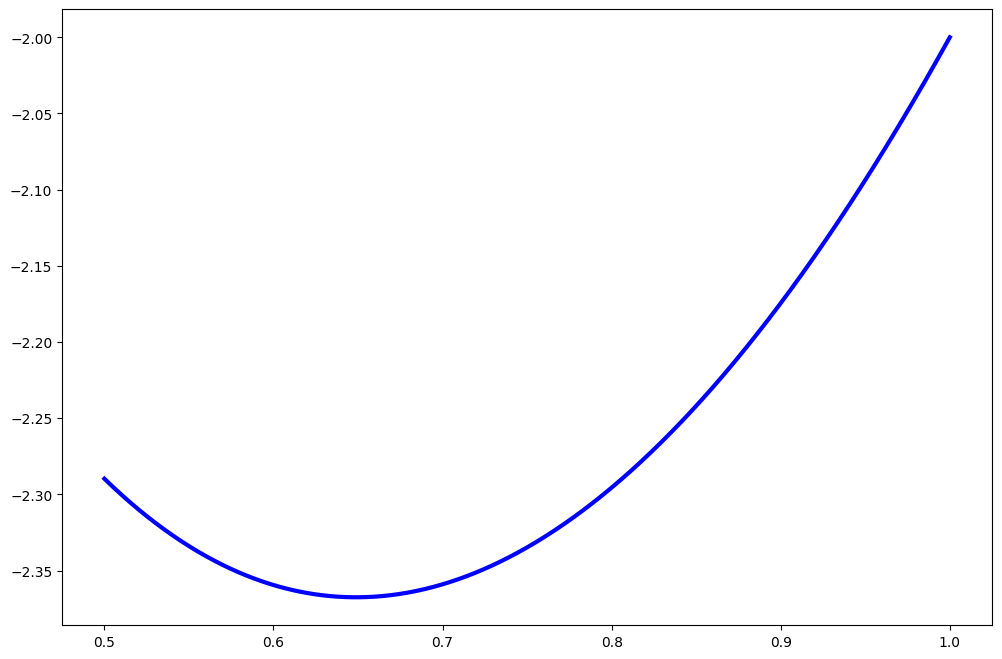

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x_for_L = np.linspace(A, B, 1000)
L = np.max(np.abs(F_PRIME(x_for_L)))
print(f"Константа Липшица L = {L}")

x = np.linspace(A, B, 1000)

x_i = A 
f_xi = F(x_i)

print(f"Начальная точка x_0 {x_i}, f(x_0) = {f_xi}")

p_values = f_xi - L * np.abs(x - x_i)

x_values = [x_i]
f_values = [f_xi]
p_functions_vals = [p_values.copy()]

for iteration in range(1000):
    # ШАГ 3/5/7: Находим следующую точку как минимум текущей p_k(x)
    next_x_idx = np.argmin(p_values)
    next_x = x[next_x_idx]

    # Проверяем, не посещали ли мы уже эту точку
    if any(np.abs(np.array(x_values) - next_x) < EPS):
        print(f"Точка {next_x} уже посещалась. Останавливаемся.")
        break

    # Вычисляем функцию в новой точке
    f_next = F(next_x)

    print(
        f"Итерация {iteration+1}: x_{iteration+1} = {next_x:.4f}, f(x_{iteration+1}) = {f_next:.4f}"
    )

    # ШАГ 4/6: Составляем новую функцию p_{k+1}(x)
    g_new = f_next - L * np.abs(x - next_x)
    p_x = np.maximum(p_x, g_new)  # p_{k+1}(x) = max(p_k(x), g(x, x_{k+1}))

    # Сохраняем данные
    x_values.append(next_x)
    f_values.append(f_next)
    p_functions_vals.append(p_x.copy())

    # Критерий остановки (опционально)
    current_best = min(f_values)
    lower_bound = np.min(p_x)
    gap = current_best - lower_bound

    print(
        f"  Текущий лучший: {current_best:.4f}, Нижняя граница: {lower_bound:.4f}, Разрыв: {gap:.4f}"
    )

    if gap < EPS:
        print("Достигнута заданная точность!")
        break

best_idx = np.argmin(f_values)
best_x = x_values[best_idx]
best_f = f_values[best_idx]

# Results
print(f"\nРезультат:")
print(f"Лучшая точка: x = {best_x:.4f}")
print(f"Лучшее значение: f(x) = {best_f:.4f}")
print(f"Всего вычислений функции: {len(x_values)}")

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(x, F(x), "b-", linewidth=3, label="f(x)")

for i, p_func in enumerate(p_values):
    alpha = 0.2 + 0.8 * (i / len(p_values))
    plt.plot(
        x, p_func, "r-", alpha=alpha, linewidth=1, label=f"p_{i}(x)" if i < 3 else ""
    )

plt.plot(x, p_x, "r-", linewidth=2, label="Финальная огибающая P(x)")
plt.scatter(x_values, f_values, color="red", s=50, zorder=5, label="Точки измерений")
plt.scatter(
    [best_x],
    [best_f],
    color="green",
    s=100,
    zorder=10,
    label=f"Лучшая точка: f({best_x:.3f}) = {best_f:.3f}",
)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод ломаных")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Метод касательной**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def tangent_method_table(f, f_prime, a=0.5, b=1.0, eps=1e-6, max_iter=50):
    steps_x = []
    steps_y = []
    table = []

    fa, fpa = f(a), f_prime(a)
    fb, fpb = f(b), f_prime(b)

    for step in range(1, max_iter + 1):

        # точка пересечения касательных
        x = (fb - fa + a*fpa - b*fpb) / (fpa - fpb)
        fx = f(x)
        fpx = f_prime(x)

        steps_x.append(x)
        steps_y.append(fx)

        table.append([step, a, b, x, fx, fpx])

        # условие остановки
        if abs(fpx) < eps:
            df = pd.DataFrame(table, columns=["Step", "a", "b", "x", "f(x)", "f'(x)"])
            return x, steps_x, steps_y, df, step

        if np.sign(fpx) == np.sign(fpa):
            a = x
            fa, fpa = fx, fpx
        else:
            b = x
            fb, fpb = fx, fpx

    df = pd.DataFrame(table, columns=["Step", "a", "b", "x", "f(x)", "f'(x)"])
    return x, steps_x, steps_y, df, max_iter


xmin, steps_x, steps_y, df_steps, num_steps = tangent_method_table(f_lambd, f_der_lambd)

print("Minimum at x =", xmin)
print("f(xmin) =", f_lambd(xmin))
print("Number of steps:", num_steps)

print("\nFirst 10 steps:")
print(df_steps.head(10))

xx = np.linspace(0.5, 1.0, 400)
yy = f_lambd(xx)

plt.figure(figsize=(7, 5))
plt.plot(xx, yy, linewidth=2, label="f(x)")
plt.scatter([xmin], [f_lambd(xmin)], s=120, color="red", zorder=5,
            label=f"min at x={xmin:.6f}")

plt.annotate(f"({xmin:.6f}, {f_lambd(xmin):.6f})",
             xy=(xmin, f_lambd(xmin)),
             xytext=(xmin + 0.02, f_lambd(xmin) + 0.15),
             arrowprops=dict(arrowstyle="->", color="red"))

plt.scatter(steps_x, steps_y, s=50, color="blue", alpha=0.5, label="steps")

plt.grid(True, alpha=0.3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Поиск минимума методом касательных")
plt.legend()
plt.show()

**Метод Ньютона**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def newton_method_table_smooth(f_prime, f_double_prime, x0=0.8, eps=1e-6, max_iter=100, max_step=0.05):
    x = x0
    iterations = 0
    steps_x = []
    steps_y = []
    table = []

    while iterations < max_iter:
        grad = f_prime(x)
        hess = f_double_prime(x)
        if abs(grad) < eps:
            break

        # классический шаг Ньютона
        delta = grad / hess

        # ограничиваем максимальный шаг для плавности
        if abs(delta) > max_step:
            delta = np.sign(delta) * max_step

        x_new = x - delta

        # Добавляем промежуточные точки для визуализации
        steps_x.extend(np.linspace(x, x_new, 5))
        steps_y.extend(f_lambd(np.linspace(x, x_new, 5)))

        # Сохраняем основной шаг в таблицу
        table.append([iterations+1, x, f_lambd(x), grad, hess])

        x = x_new
        iterations += 1

    # Финальный шаг
    steps_x.append(x)
    steps_y.append(f_lambd(x))
    table.append([iterations+1, x, f_lambd(x), f_prime(x), f_double_prime(x)])

    df = pd.DataFrame(table, columns=["Step", "x", "f(x)", "f'(x)", "f''(x)"])
    return x, steps_x, steps_y, df, iterations

xmin, steps_x, steps_y, df_steps, num_steps = newton_method_table_smooth(f_der_lambd, f_double_der_lambd)

print("Minimum at x =", xmin)
print("f(xmin) =", f_lambd(xmin))
print("Number of steps:", num_steps)

print("\nFirst 10 steps:")
print(df_steps.head(10))

# График
xx = np.linspace(0.5, 1.0, 400)
yy = f_lambd(xx)

plt.figure(figsize=(7,5))
plt.plot(xx, yy, linewidth=2, label="f(x)")
plt.scatter([xmin], [f_lambd(xmin)], s=120, color="red", zorder=5,
            label=f"min at x={xmin:.6f}")
plt.annotate(f"({xmin:.6f}, {f_lambd(xmin):.6f})",
             xy=(xmin, f_lambd(xmin)),
             xytext=(xmin + 0.02, f_lambd(xmin) + 0.2),
             arrowprops=dict(arrowstyle="->", color="red"))

# Синие точки шагов (плавные)
plt.scatter(steps_x, steps_y, s=30, color="blue", alpha=0.5, label="steps trajectory")

plt.grid(True, alpha=0.3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Метод Ньютона с плавной траекторией шагов")
plt.legend()
plt.show()
